# Lab01 - Getting Started
### TDS3651 Visual Information Processing


### Have you gone through Lab 00?

Lab 00 serves as a quick refresher to Python language (at least sufficient for you to code when you get into the main topics of this course). If you have not done it, please make sure you go through it during your Self-Learning Time. 

### This lab

**TDS3651 Visual Information Processing** labs are primarily guided and self-paced, while it also contains some questions that you are require to complete and additional exercises (usually at the end). The instructor will not provide any solutions, so as to encourage you to discuss this with other students.

This lab introduces some basic input/output mechanisms for handling images, and some fundamental image processing operations such as arithmetic operations, and image blending. This lab is primarily guided (in many portions) while it also contains sections that you are require to complete. 

## Image Libraries for Python

Among the more popularly used libraries for processing images and videos in the Python environment are: 
* [**OpenCV**](https://docs.opencv.org/trunk/index.html) 
* [**Pillow**](https://pillow.readthedocs.io/en/latest/index.html) (previously known as **Python Imaging Library (PIL)**).
* [**scikit-image**](http://scikit-image.org/docs/stable/), which is the image processing library of SciPy.

We will be mainly using the OpenCV library in most practical modules (as it is the richer of the two in terms of functionalities for image processing and computer vision), although some exposure to PIL is also helpful and might come in handy at times. OpenCV itself has slightly different functionality sets for C++ and Python languages, with the C++ library being the more complete of the two. The scikit-image is not as widely used but it contains some useful implementations. 

OpenCV also comes with a very comprehensive bunch of Python tutorials which you can find [here](https://docs.opencv.org/trunk/d6/d00/tutorial_py_root.html). Due to some syntax differences between the C++ and Python versions, you can use the function `help(function-name)` and the C++ OpenCV reference to cross-check the usages.

### Before starting
#### [For those using own PC/laptops]

First, ensure that you have got the latest OpenCV version (4.5.3) installed for Python. There are many ways (and many packaged versions) that can get you OpenCV installed. 

#### OpenCV
Following the instructions provided, type at terminal/prompt: 

`pip install opencv-python`. 

If you have an existing OpenCV packages installed and you wish to upgrade it. You can type at terminal/prompt: 

`pip install --upgrade opencv-python`

Some dependencies might be updated along the process.   

#### Pillow & scikit-image
Both Pillow and scikit-image packages come together with Anaconda. However, their existing versions may be slightly outdated. You can update them together using conda:

`conda update pillow scikit-image`

Some dependencies might be updated along the process.   

After getting these packages installed, let's check if they have been properly installed

In [1]:
import cv2
cv2.__version__

'4.7.0'

In [2]:
from PIL import Image 
Image.__version__

'10.0.1'

In [3]:
import skimage
skimage.__version__

C:\Users\waiee\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


'0.19.2'

#### [For Google Colab users]

Mount your Google Drive to this session and set the path of the specific folder you kept the materials of this lab in:

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Set the path of the active folder of this lab:

In [5]:
path = 'C:/Users/waiee/Downloads/Final Year Sem 1/VIP/tuto01/Lab01 Images/'

Also, make sure some of the other supporting libraries are also available in your Python environment:

In [6]:
import numpy as np
import matplotlib.pyplot as plt

If all is good, let's get started with some image reading and writing.

## Image Reading, Displaying, Writing

The first steps to have an image loaded to the memory of your computer is to read it from an image file. Doing it on Python is as simple as a one-liner. Of course, there are other sophisticated ways of reading an image from a URL or through the network, but we will not be covering those techniques.

In [7]:
img = cv2.imread(path + 'opencv-logo.png')                              # IMREAD always reads an RGB image in B-G-R order (reversed)
img_gray = cv2.imread(path + 'opencv-logo.png',cv2.IMREAD_GRAYSCALE)    # read image directly as grayscale

img_gray = cv2.imread(path + 'opencv-logo.png',0)

Note: OpenCV uses the "BGR" arrangement instead of more conventional understanding of "RGB". (For the long story, you can read [here](https://www.learnopencv.com/why-does-opencv-use-bgr-color-format/) why is it so).

We can then verify if the two images are correctly read by checking its dimension from the variable list,

In [8]:
whos

Variable   Type       Data/Info
-------------------------------
Image      module     <module 'PIL.Image' from <...>packages\\PIL\\Image.py'>
cv2        module     <module 'cv2' from 'C:\\U<...>kages\\cv2\\__init__.py'>
img        ndarray    600x600x3: 1080000 elems, type `uint8`, 1080000 bytes (1.02996826171875 Mb)
img_gray   ndarray    600x600: 360000 elems, type `uint8`, 360000 bytes (351.5625 kb)
np         module     <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
path       str        C:/Users/waiee/Downloads/<...>/VIP/tuto01/Lab01 Images/
plt        module     <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
skimage    module     <module 'skimage' from 'C<...>s\\skimage\\__init__.py'>


Noticed also that the size that the image occupies in your computer's memory is given in bytes (and in kb, Mb).


### Matplotlib

Next, we can display the image within the notebook.<br>
Matplotlib is a plotting library for Python which gives you wide variety of plotting methods. Here, you will learn how to display image with Matplotlib. With Matplotlib, you can also display interactive plots which can zoom in and out of images, save and etc, using the additional line `%matplotlib %notebook`. If you are using Jupyter, all plots are plotted inline (in the notebook) by default.

For ease of plotting correctly with matplotlib, it is good to have it converted to RGB ordering (instead of BGR from OpenCV). 

In [9]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)      # is a good idea to convert BGR to RGB as matplotlib uses RGB

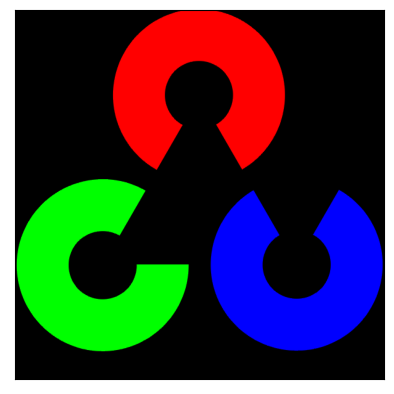

In [10]:
from matplotlib import pyplot as plt

# the 'notebook' option enables interactive plots. Note: switch back to the 'inline' option later on. 

#%matplotlib notebook   
import matplotlib  # temporary hack

%matplotlib inline

plt.imshow(img)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

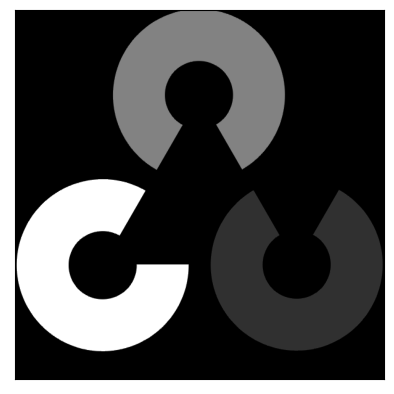

In [11]:
plt.imshow(img_gray,cmap='gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

Have a look at more plotting styles and features from [this documentation](http://matplotlib.org/api/pyplot_api.html). Try out some if you wish.

If you are using Jupyter Notebook on your own machine, you can also try using the functions from OpenCV to display the images.<br> 
The function will open a new window to show the image.<br>
Note: OpenCV `imshow()` function is restricted on Google Colab as it will crash your browser.

In [ ]:
cv2.imshow('Color image',img)
cv2.imshow('Grayscale image',img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()      # this snippet of code will finish execution when the two windows are closed

And also by displaying them.

In [ ]:
cv2.imshow('Color image',img)
cv2.imshow('Grayscale image',img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()      # this snippet of code will finish execution when the two windows are closed

The last two lines of code are handling the display of the image in an external (pop-out) window. The last line particularly waits for you to close 

Now, let's save the grayscale image as a file to disk. After that, check if you can find the newly saved image file.

In [12]:
cv2.imwrite(path + 'opencv-gray.png',img_gray)

True

### Basic Operations


Next, let's look at some basic image operations that will come in handy later.

You can access a pixel value by its row and column coordinates. Since we have already converted the BGR image to a standard RGB image, it returns an array of Red, Green, Blue values (in this order), respectively. For grayscale image, it is straightforward; the corresponding intensity is returned.

In [13]:
# accessing a location at the blue region of the logo
px = img[500, 400]
print(px)

# accessing only the blue pixel at that same location
blue = img[500,400,2]
print(blue)

[  0   0 255]
255


These pixel intensity values can be modified by assigning a new colour to it. Let's modify that same pixel to white colour, and then, try changing more pixels at one go (using numpy slicing).

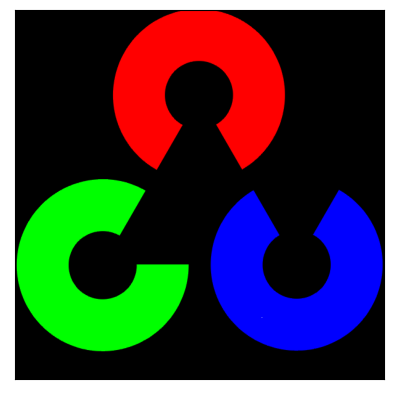

In [14]:
# Change pixel colour to white
img[500, 400] = [255, 255, 255]
plt.imshow(img)
plt.xticks([]), plt.yticks([])  
plt.show()      # can you see the white dot? :)

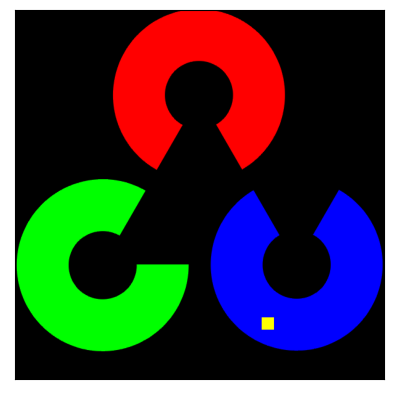

In [17]:
# Change a larger patch of pixels (20x20 in size), all to white
patchsize = 20
img[500:500+patchsize, 400:400+patchsize] = [255, 255, 0]
plt.imshow(img)
plt.xticks([]), plt.yticks([])  
plt.show() 

Let's check the value of a pixel in that patch area.

In [18]:

img[510, 415]

array([255, 255,   0], dtype=uint8)

There are other Numpy methods that are help to find image properties. 

The "shape" of image is accessed by img.shape *(I personally prefer to call it 'size' of the image, but perhaps they want to be generic when identifying n-dimensional arrays.)* `img.shape` returns a tuple of number of rows, columns and channels (if image is color). Image datatype is obtained by `img.dtype` while the total number of pixels can be accessed by `img.size` 

What is the actual size of the data (in bytes) that's residing in the memory?

In [19]:
print(img.shape)
print(img.size)
print(img.dtype)

(600, 600, 3)
1080000
uint8


Note: `img.dtype` is very important while debugging because a large number of errors in OpenCV-Python code is caused by invalid datatype.

Of course, it's easy to just use `whos` to display all these properties (but all variables in memory are shown).

In [ ]:
whos

Before we proceed further, let's put the image displaying codes into a function definition, so that we can just call it with a single function call from hereon

In [20]:
def showImage(img, titlestr="" ):
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img)
    plt.xticks([]), plt.yticks([])  
    plt.title(titlestr)
    plt.show() 

**Q1.** Call the function `showImage` to test it.

In [ ]:
showimage()

### Image ROI


A Region-of-Interest (ROI) refers to a certain sub-part or region of the image that you wish to process. Let's try to cut a ROI from the logo image and swap it with another ROI within the image!

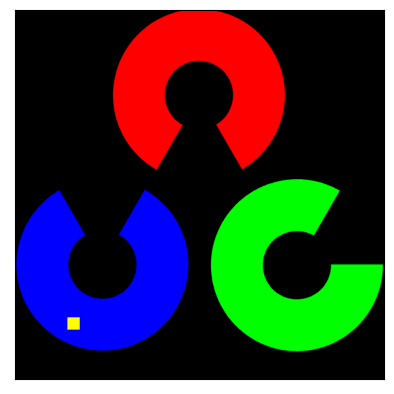

In [21]:
# redROI = img[272:600, 315:600]               # this slicing merely takes a 'view' into the same data, no copies made
redROI = img[272:600, 315:600].copy()          # enables deep copy --> make another copy elsewhere in memory
img[272:600, 315:600] = img[272:600, 0:285];
img[272:600, 0:285] = redROI 
showImage(img)

# Note: running this cell another time will swap back the blue and green 'C's !

### Splitting/Merging Image Channels


If you need to work separately on the individual R, G, or B channels of a color image, then you need to split the RGB images to single planes. You can also join these individual channels back to a RGB image.

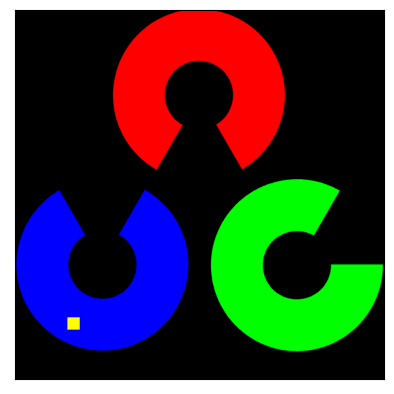

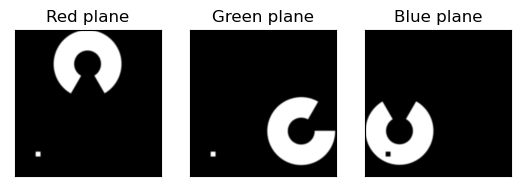

In [22]:
r,g,b = cv2.split(img)              
img = cv2.merge((r,g,b))
showImage(img)     # verify that image is still the same after joining back

# Another function for setting subplot images --> Note: plt.show() only called after all subplots defined
def showSubplotImage(img, titlestr="" ):
    plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])  
    plt.title(titlestr)

# Creating 3 subplots (in 1 row) to show the 3 planes for each colour channel
fig = plt.subplots(nrows=1, ncols=3)
plt.subplot(131), showSubplotImage(r, 'Red plane')
plt.subplot(132), showSubplotImage(g, 'Green plane')
plt.subplot(133), showSubplotImage(b, 'Blue plane')
plt.show()

More on colors later on!

## Arithmetic Operations on Images

Image addition in OpenCV is pretty easy. Intuitively, the `+` sign should suffice in performing this operation. Let's try adding two images together...

In [23]:
img_ml = cv2.imread(path + 'ml.png')
added = img_gray + img_ml

ValueError: operands could not be broadcast together with shapes (600,600) (397,344,3) 

This is not possible because you cannot add two arrays that are of different dimensions! So let's resize one of the two images to follow the other.

In [24]:
dim = (344, 397)
opencv_resized = cv2.resize(img, dim)
opencv_resized.shape

(397, 344, 3)

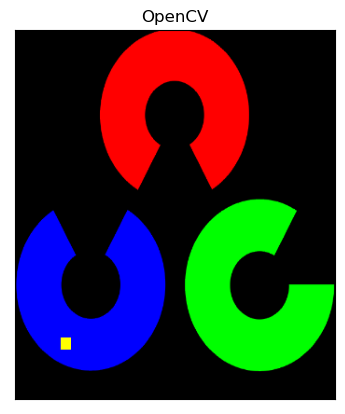

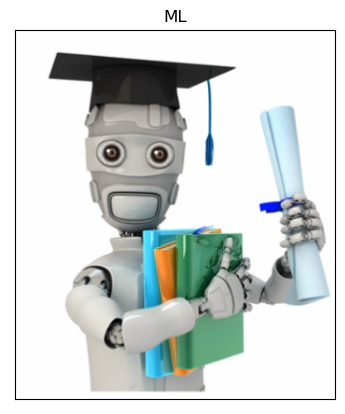

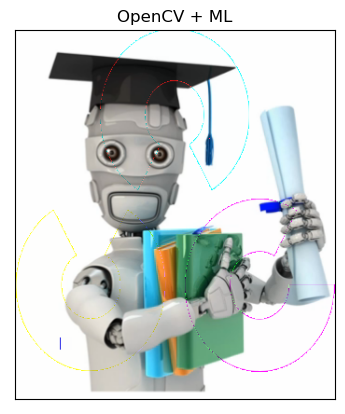

In [25]:
added = opencv_resized + img_ml
showImage(opencv_resized, 'OpenCV')
showImage(img_ml, 'ML')
showImage(added, 'OpenCV + ML')

Something not quite right still! The added image does not seemed to be correctly blended. This is because Numpy addition `+` can easily result in an overflow of the `uint8` range. Try this:

In [28]:
x = np.uint8([250])
y = np.uint8([255])
print(x - y)    # this is 250 + 10 = 260 , when it overflows past 255, the added values start over again...

[251]


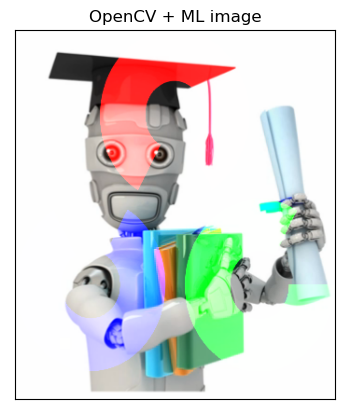

In [29]:
added2 = cv2.add(img_ml, opencv_resized)
showImage(added2, 'OpenCV + ML image')

To have more control over how much each of the two images can be blended together, try the function `cv2.addWeighted`.

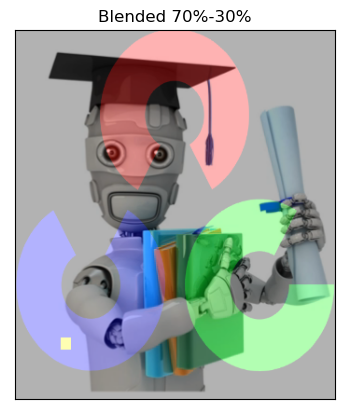

In [30]:
blended = cv2.addWeighted(img_ml,0.7,opencv_resized,0.3,0)     # 70% of ML image, 30% of OpenCV image
showImage(blended, 'Blended 70%-30%')

**Q2**. Create a GIF animation by creating a series of images that capture a  smooth transition between two blended images. You may use the image blending operation done earlier with the weighted addition function `cv2.addWeighted`.

The `imageio` package (available in Anaconda) has this nifty feature that allows us to save a list of images into a GIF file. Some of these utility code are given.

In [34]:
import os
import imageio

# folder containing the images needed
gif_dir = path + "gif_folder/"

# creates the folder if it does not exist
if not os.path.exists(gif_dir):  
    os.makedirs(gif_dir) 

# add your code here in a loop ####################
for i in range(11):
    # add code here
    blended = cv2.addWeighted(img_ml,0.7+i,opencv_resized,0.3+i,0)
    savedgif = cv2.imwrite

# to generate the GIF from a series of images in a folder
images = []
for subdir, dirs, files in os.walk(gif_dir):
    for file in files:
        file_path = os.path.join(subdir, file)
        if file_path.endswith(".png"):
            images.append(imageio.imread(file_path))
imageio.mimsave(path+'/movie.gif', images)

How about subtracting two images? Are there any negative values after doing this?

What if we find the absolute difference between two images instead?

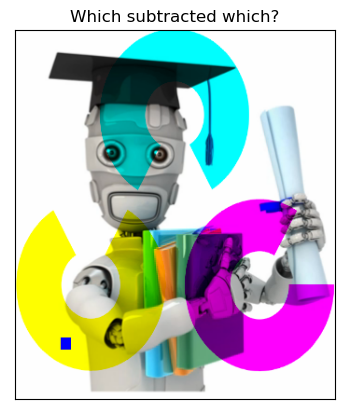

In [35]:
subtracted = cv2.subtract(img_ml, opencv_resized)       # which subtracted which?
showImage (subtracted, 'Which subtracted which?')


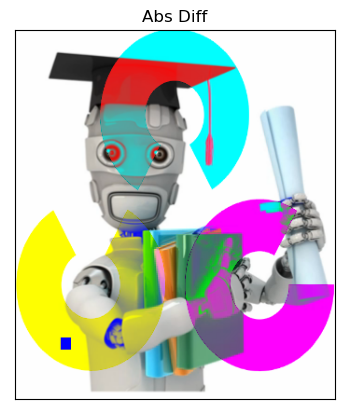

In [36]:
absdifferenced = cv2.absdiff(img_ml, opencv_resized)
showImage (absdifferenced, 'Abs Diff')

## Using Spyder

Ultimately, some people may find using Jupyter notebooks a hassle when they need to re-run big portions of code (including some earlier code as well), but of course some may not if they know how to utilize nifty options from the "Cell" menu item. If you do, you can try using Spyder, which is a typical IDE that gives you better control in writing programs.

**Q3.** Just to be familiar, transfer some code (eg. the animated gif program) from this lab tutorial to Spyder (create new .py file, run), and get it working. Writing codes over there gives you a better view of what code can be further modularized into functions. If you ever need to test out short snippets of code over there, the iPython console is visible there as well.

## Trying Pillow & scikit-image packages

Our practicals will be mostly focused on the OpenCV library. Feel free to try out some hands-on tutorial on the other two libraries: [Pillow](https://pillow.readthedocs.io/en/latest/handbook/tutorial.html) and [`scikit-image`](http://www.scipy-lectures.org/packages/scikit-image/index.html#introduction-and-concepts).

Most of these basic operations covered in this module are available on all three libraries. Perhaps the comprehensiveness of the OpenCV library would be most telling in the advanced topics.

## Additional Exercises


**Q**. Write a handy function that can show multiple images in a single figure using the `subplot` function, given the number of images. Decide what other parameters may be necessary.